# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib

# Loading the raw Airbnb LA data

In [2]:
listings_df = pd.read_csv("../data/raw/listings.csv.gz", compression="gzip")

In [3]:
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2708,https://www.airbnb.com/rooms/2708,20250901181307,2025-09-03,city scrape,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Run Runyon Canyon<br /><br />Gym & Sauna <br /...,"Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/hosting/Hosti...,3008,...,4.98,4.96,4.87,NaN,f,2,0,2,0,0.33
1,2732,https://www.airbnb.com/rooms/2732,20250901181307,2025-09-03,city scrape,Zen Life at the Beach,An oasis of tranquility awaits you.,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082993/c5a99...,3041,...,4.48,4.91,4.22,228269,f,2,1,1,0,0.14
2,2864,https://www.airbnb.com/rooms/2864,20250901181307,2025-09-03,previous scrape,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


Check how many rows and columns in the dataframe

In [4]:
listings_df.shape

(45886, 79)

Display all the available column names in the dataframe

In [5]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45886 entries, 0 to 45885
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            45886 non-null  int64  
 1   listing_url                                   45886 non-null  object 
 2   scrape_id                                     45886 non-null  int64  
 3   last_scraped                                  45886 non-null  object 
 4   source                                        45886 non-null  object 
 5   name                                          45885 non-null  object 
 6   description                                   44917 non-null  object 
 7   neighborhood_overview                         19936 non-null  object 
 8   picture_url                                   45886 non-null  object 
 9   host_id                                       45886 non-null 

In [7]:
reviews_df = pd.read_csv("../data/raw/reviews.csv.gz", compression="gzip")

In [8]:
reviews_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
1,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...
2,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...
3,2708,61157407,2016-02-01,33226412,Haroon,Charles is a most wonderful host. I enjoyed my...
4,2708,66196280,2016-03-20,23408691,Massimo Litterio,Chas is a really good host. He gives me a lot ...


Check how many rows and columns in the dataframe

In [9]:
reviews_df.shape

(1747347, 6)

Display all the available column names in the dataframe

In [10]:
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [11]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747347 entries, 0 to 1747346
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date           object
 3   reviewer_id    int64 
 4   reviewer_name  object
 5   comments       object
dtypes: int64(3), object(3)
memory usage: 80.0+ MB


# Merge Listings and Reviews

Merge reviews with listings on listing_id

In [12]:
la_reviews = reviews_df.merge(
    listings_df,
    left_on='listing_id',
    right_on='id',
    how='left',
    suffixes=('_review', '_listing')
)

In [13]:
la_reviews.shape

(1747347, 85)

In [14]:
la_reviews.head(3)

,listing_id,id_review,date,reviewer_id,reviewer_name,comments,id_listing,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...,2708,https://www.airbnb.com/rooms/2708,20250901181307,2025-09-03,...,4.98,4.96,4.87,NaN,f,2,0,2,0,0.33
1,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...,2708,https://www.airbnb.com/rooms/2708,20250901181307,2025-09-03,...,4.98,4.96,4.87,NaN,f,2,0,2,0,0.33
2,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...,2708,https://www.airbnb.com/rooms/2708,20250901181307,2025-09-03,...,4.98,4.96,4.87,NaN,f,2,0,2,0,0.33


# Select the relevant columns

In [15]:
la_reviews_clean = la_reviews[[
    'listing_id', 'id_review', 'date', 'reviewer_id', 'comments',   # review info
    'name', 'property_type', 'room_type', 'neighbourhood_cleansed', 'latitude', 'longitude',  # listing info
    'host_id', 'host_total_listings_count', 'host_name',  # host info
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value',
    'accommodates', 'bedrooms', 'beds', 'price'
]]

In [16]:
la_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747347 entries, 0 to 1747346
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   listing_id                   int64  
 1   id_review                    int64  
 2   date                         object 
 3   reviewer_id                  int64  
 4   comments                     object 
 5   name                         object 
 6   property_type                object 
 7   room_type                    object 
 8   neighbourhood_cleansed       object 
 9   latitude                     float64
 10  longitude                    float64
 11  host_id                      int64  
 12  host_total_listings_count    float64
 13  host_name                    object 
 14  number_of_reviews            int64  
 15  review_scores_rating         float64
 16  review_scores_accuracy       float64
 17  review_scores_cleanliness    float64
 18  review_scores_checkin        float64
 19  

Create a separate DataFrame – safely

In [17]:
la_reviews_clean = la_reviews[[
    'listing_id', 'id_review', 'date', 'reviewer_id', 'comments',
    'name', 'property_type', 'room_type', 'neighbourhood_cleansed',
    'latitude', 'longitude', 'host_id', 'host_total_listings_count',
    'host_name', 'number_of_reviews', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value',
    'accommodates', 'bedrooms', 'beds', 'price'
]].copy()

# Annual analysis and period selection

Convert review date to datetime

In [18]:
la_reviews_clean['date'] = pd.to_datetime(
    la_reviews_clean['date'], errors='coerce'
)

In [19]:
print(la_reviews_clean['date'].dtype)

datetime64[ns]


Extract year

In [20]:
la_reviews_clean['year'] = la_reviews_clean['date'].dt.year

Count reviews per year

In [21]:
reviews_per_year = la_reviews_clean['year'].value_counts().sort_index()

In [22]:
print(reviews_per_year)

year
2009        24
2010       197
2011       857
2012      2147
2013      5179
2014     12727
2015     26784
2016     50772
2017     80267
2018    120006
2019    163212
2020     99500
2021    145781
2022    205464
2023    262568
2024    323431
2025    248431
Name: count, dtype: int64


# Visualisation

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Filter years 2014-2025
df = la_reviews_clean[(la_reviews_clean['year'] >= 2014) & (la_reviews_clean['year'] <= 2025)].copy()

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create season column
def get_season(date):
    if pd.isna(date):
        return None
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].apply(get_season)
df['combined'] = 'Combined'

# Optional: sample 50k rows to avoid memory issues
df_sample = df.sample(n=50000, random_state=42)

function for plotting graphs

In [29]:
def plot_season_timeline(data, property_type_col='property_type', date_col='date'):
    types = data[property_type_col].dropna().unique().tolist()
    types = types[:2] 
    types.append('Combined')
    
    fig, axes = plt.subplots(nrows=len(types), ncols=2, figsize=(14, 5*len(types)))
    
    if len(types) == 1:
        axes = [axes]  # for one type
    
    for i, t in enumerate(types):
        ax_bar, ax_line = axes[i, 0], axes[i, 1]
        
        # Filter by type
        if t == 'Combined':
            subset = data.copy()
        else:
            subset = data[data[property_type_col] == t]
        
        # Seasonal distribution
        season_counts = subset['season'].value_counts().reindex(['Winter','Spring','Summer','Fall']).fillna(0)
        season_percent = season_counts / season_counts.sum() * 100
        
        # Bar chart
        ax_bar.bar(season_counts.index, season_counts.values, color=['lightblue','steelblue','indianred','orange'])
        for j, v in enumerate(season_counts.values):
            ax_bar.text(j, v + max(season_counts.values)*0.01, f"{v}\n({season_percent.iloc[j]:.1f}%)",
                        ha='center', fontweight='bold')
        ax_bar.set_title(f'{t} - Seasonal Distribution')
        ax_bar.set_ylabel('Number of Reviews')
        
       # Line chart by month
        monthly_counts = subset.groupby(pd.Grouper(key=date_col, freq='ME')).size()
        ax_line.plot(monthly_counts.index, monthly_counts.values, color='steelblue')
        ax_line.fill_between(monthly_counts.index, monthly_counts.values, color='steelblue', alpha=0.2)
        ax_line.set_title(f'{t} - Timeline')
        ax_line.set_ylabel('Reviews per Month')
    
    plt.suptitle('Seasonal Review Distribution and Timeline (2014-2025)', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

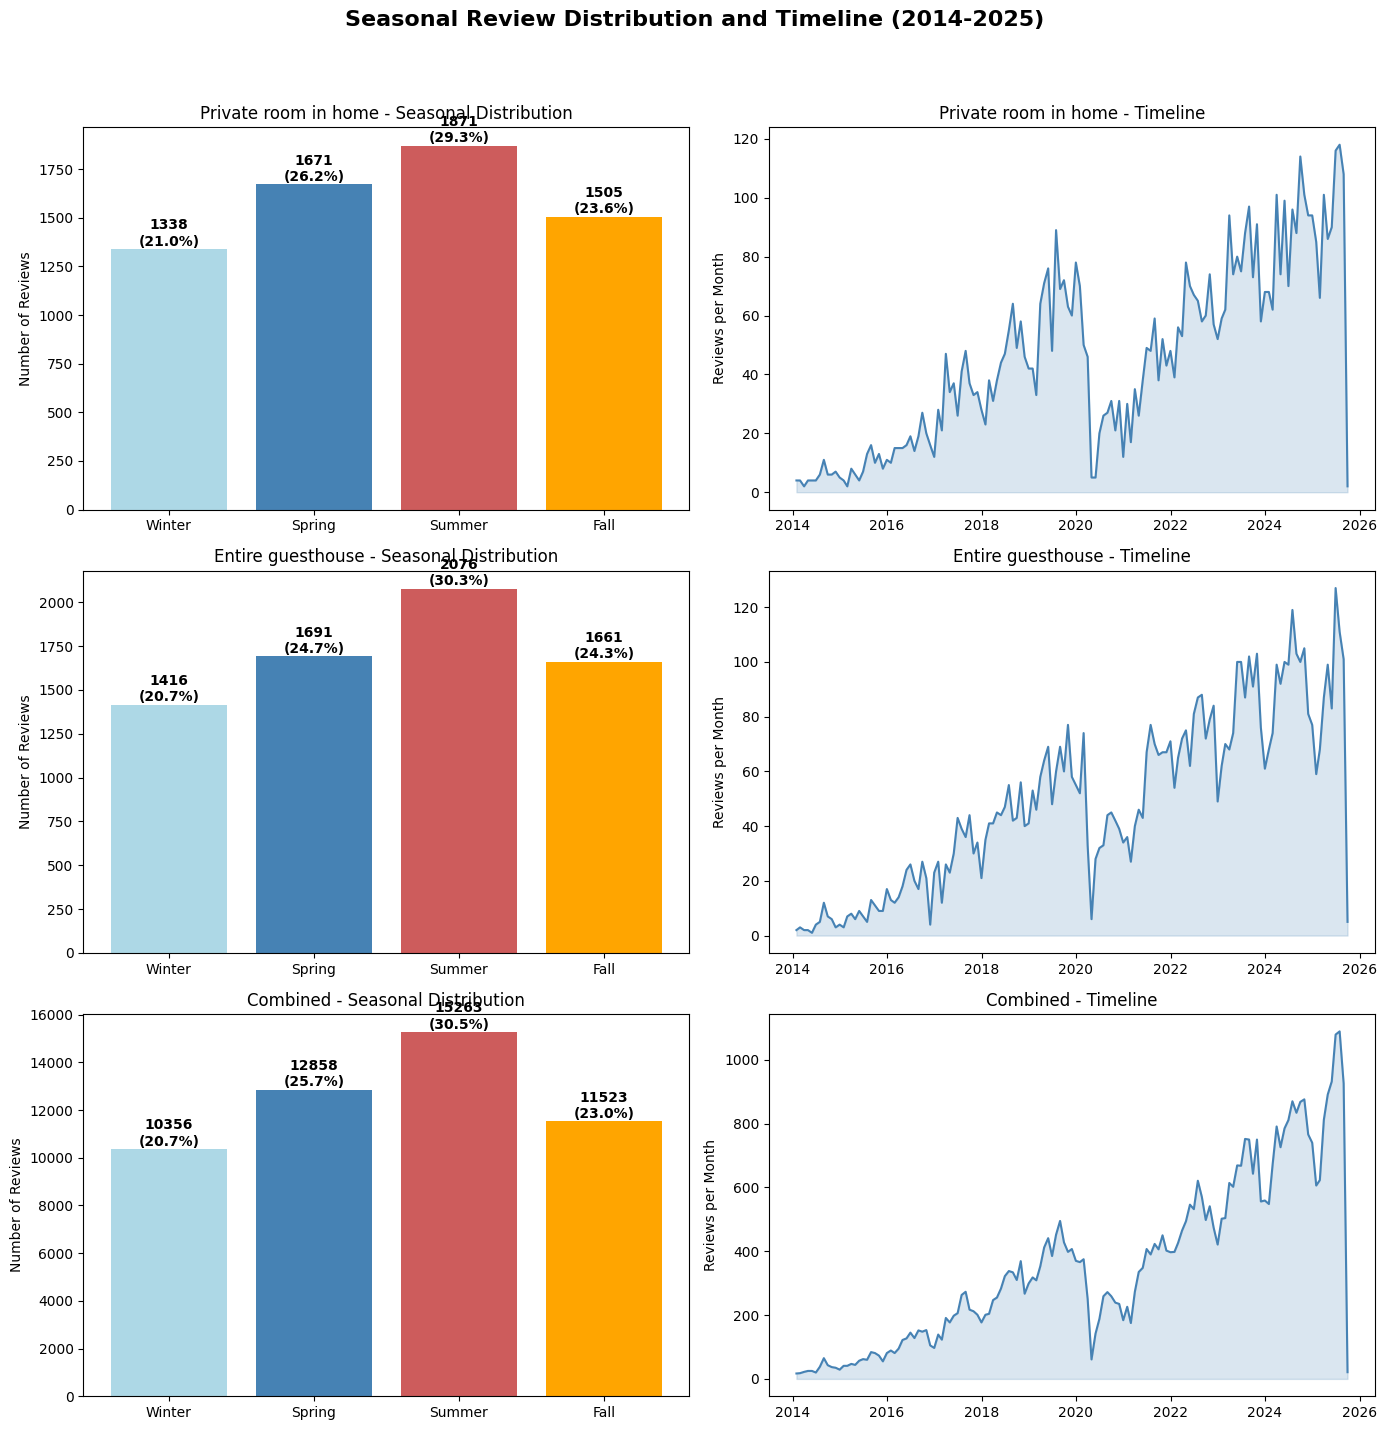

In [30]:
# Use sample for safer plotting
plot_season_timeline(df_sample)